In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### filter

In [38]:
adata = sc.read_h5ad('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-10-11-Rena-HeLa16Gene-preflt.h5ad')
n_samples = 7

In [39]:
# add sample correspondence to adata
area2sample = dict()
area2sample[1] = '20h_pulse'
area2sample[2] = '1h_pulse_2h_chase'
area2sample[3] = '1h_pulse_4h_chase'
area2sample[4] = '1h_pulse_6h_chase'
area2sample[5] = '1h_pulse_1h_chase'
area2sample[6] = '1h_pulse'
area2sample[7] = 'STARmap'

In [40]:
_samples = [area2sample[s] for s in adata.obs['sample']]
adata.obs['imaging_Area'] = adata.obs['sample']
adata.obs['sample'] = _samples
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,imaging_Area
0,0,20h_pulse,930252,99,4953,24,15,2.772589,463.0,6.139884,1
1,1,20h_pulse,703315,90,7027,23,15,2.772589,311.0,5.743003,1
2,2,20h_pulse,940040,129,2815,21,14,2.708050,346.0,5.849325,1
3,3,20h_pulse,1656235,190,3781,23,15,2.772589,693.0,6.542472,1
4,4,20h_pulse,700564,176,1398,25,15,2.772589,275.0,5.620401,1
...,...,...,...,...,...,...,...,...,...,...,...
3671,507,STARmap,827794,12997,2501,16,16,2.833213,501.0,6.218600,7
3672,508,STARmap,731055,13051,6528,16,16,2.833213,795.0,6.679599,7
3673,509,STARmap,759538,13031,7709,16,15,2.772589,655.0,6.486161,7
3674,510,STARmap,753529,13038,5499,16,14,2.708050,465.0,6.144186,7


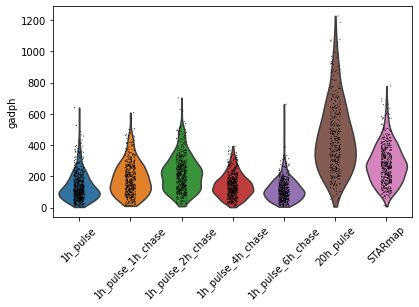

In [97]:
adata.obs['gadph'] = adata.X[:,-1]
sc.pl.violin(adata, keys='gadph', groupby='sample', rotation=45)

In [70]:
# filtering -- TODO tune
sc.pp.filter_cells(adata, min_genes=1)
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,imaging_Area,gadph_normalized_total_counts,nucl_pct,n_genes
0,0,20h_pulse,930252,99,4953,24,15,2.772589,463.0,6.139884,1,0.970213,0.653509,15
1,1,20h_pulse,703315,90,7027,23,15,2.772589,311.0,5.743003,1,1.087248,0.592593,15
2,2,20h_pulse,940040,129,2815,21,14,2.708050,346.0,5.849325,1,1.306667,0.545918,14
3,3,20h_pulse,1656235,190,3781,23,15,2.772589,693.0,6.542472,1,1.272131,0.538660,15
4,4,20h_pulse,700564,176,1398,25,15,2.772589,275.0,5.620401,1,1.291667,0.322581,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,507,STARmap,827794,12997,2501,16,16,2.833213,501.0,6.218600,7,4.060606,0.442786,16
3672,508,STARmap,731055,13051,6528,16,16,2.833213,795.0,6.679599,7,2.397436,0.278075,16
3673,509,STARmap,759538,13031,7709,16,15,2.772589,655.0,6.486161,7,3.281046,0.362550,15
3674,510,STARmap,753529,13038,5499,16,14,2.708050,465.0,6.144186,7,2.576923,0.402985,14


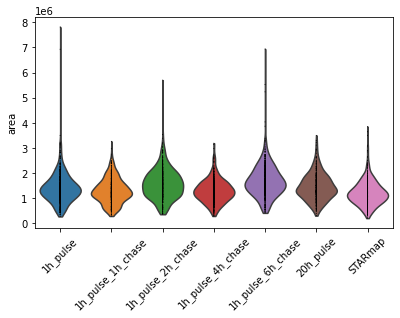

In [71]:
# cell volume
sc.pl.violin(adata, keys='area', groupby='sample', jitter=False, rotation=45)

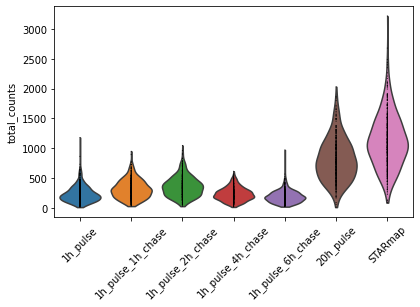

In [72]:
# total counts
sc.pl.violin(adata, keys='total_counts', groupby='sample', jitter=False, rotation=45)

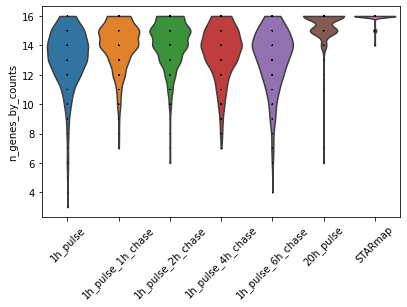

In [73]:
# n_genes per cell
sc.pl.violin(adata, keys='n_genes_by_counts', groupby='sample', jitter=False, rotation=45)

### normalize by GADPH

In [74]:
# normalize to GADPH counts
X_gadph_normalized = adata.X / (np.reshape(adata.X[:,15], (adata.X.shape[0],1)))
adata.layers['gadph_normalized'] = X_gadph_normalized
adata.obs['gadph_normalized_total_counts'] = np.sum(X_gadph_normalized[:,:15], axis=1)
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,imaging_Area,gadph_normalized_total_counts,nucl_pct,n_genes
0,0,20h_pulse,930252,99,4953,24,15,2.772589,463.0,6.139884,1,0.970213,0.653509,15
1,1,20h_pulse,703315,90,7027,23,15,2.772589,311.0,5.743003,1,1.087248,0.592593,15
2,2,20h_pulse,940040,129,2815,21,14,2.708050,346.0,5.849325,1,1.306667,0.545918,14
3,3,20h_pulse,1656235,190,3781,23,15,2.772589,693.0,6.542472,1,1.272131,0.538660,15
4,4,20h_pulse,700564,176,1398,25,15,2.772589,275.0,5.620401,1,1.291667,0.322581,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,507,STARmap,827794,12997,2501,16,16,2.833213,501.0,6.218600,7,4.060606,0.442786,16
3672,508,STARmap,731055,13051,6528,16,16,2.833213,795.0,6.679599,7,2.397436,0.278075,16
3673,509,STARmap,759538,13031,7709,16,15,2.772589,655.0,6.486161,7,3.281046,0.362550,15
3674,510,STARmap,753529,13038,5499,16,14,2.708050,465.0,6.144186,7,2.576923,0.402985,14


In [46]:
adata.write_h5ad('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-10-11-Rena-HeLa16Gene-preflt2.h5ad')

In [47]:
_ad = sc.read_h5ad('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-10-11-Rena-HeLa16Gene-preflt2.h5ad')


In [48]:
_ad.obs.to_csv('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-10-11-cell_metadata.csv')

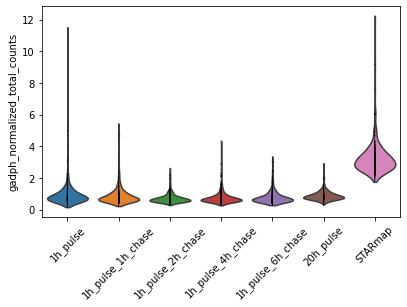

In [49]:
sc.pl.violin(adata, keys='gadph_normalized_total_counts', groupby='sample', jitter=False, rotation=45)

### detection efficiency

In [80]:
avg_20h = np.mean(X_gadph_normalized[adata.obs['sample']=='20h_pulse'], axis=0)
avg_star = np.mean(X_gadph_normalized[adata.obs['sample']=='STARmap'], axis=0)
detec_effi = avg_20h / avg_star

In [81]:
df_detec = pd.DataFrame(zip(adata.var.index, detec_effi), columns=['gene', 'detection efficiency'])
df_detec

,gene,detection efficiency
0,EEF2,0.109659
1,TFRC,0.503751
2,NEAT1,0.412069
3,TOP2A,0.573994
4,DAG1,0.615645
5,MKI67,0.153840
6,TMEM43,0.432077
7,TTYH3,0.167215
8,BIRC5,0.546897
9,PCNA,0.368538


<AxesSubplot:xlabel='detection efficiency', ylabel='gene'>

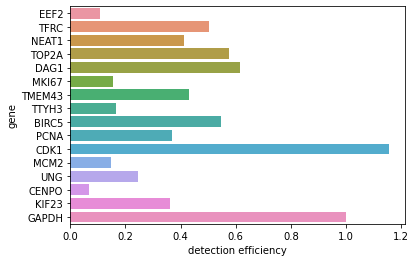

In [82]:
sns.barplot(data=df_detec, y='gene', x='detection efficiency')

### labeling efficiency

In [85]:
avg_1h = np.mean(X_gadph_normalized[adata.obs['sample']=='1h_pulse'], axis=0)
label_effi = avg_1h / avg_20h

In [93]:
df_label = pd.DataFrame(zip(adata.var.index, label_effi), columns=['gene', 'labeling efficiency (1h / 20h)'])
df_label

,gene,labeling efficiency (1h / 20h)
0,EEF2,0.433760
1,TFRC,0.698680
2,NEAT1,1.746646
3,TOP2A,2.596304
4,DAG1,0.782815
5,MKI67,0.693272
6,TMEM43,0.925550
7,TTYH3,1.130849
8,BIRC5,0.507725
9,PCNA,0.609348


<AxesSubplot:xlabel='labeling efficiency (1h / 20h)', ylabel='gene'>

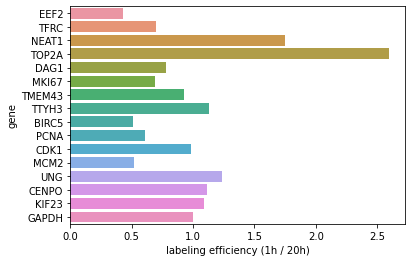

In [94]:
sns.barplot(data=df_label, y='gene', x='labeling efficiency (1h / 20h)')

<AxesSubplot:xlabel='labeling efficiency (1h/star)', ylabel='gene'>

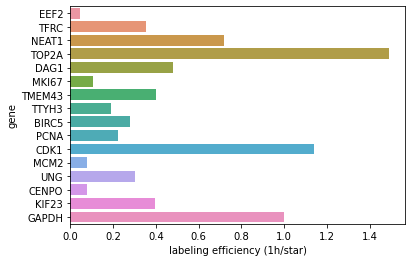

In [88]:
# alternative: 1h / STARmap
label_effi2 = avg_1h / avg_star
df_label2 = pd.DataFrame(zip(adata.var.index, label_effi2), columns=['gene', 'labeling efficiency (1h/star)'])
sns.barplot(data=df_label2, y='gene', x='labeling efficiency (1h/star)')

## nucleus percentage
excluding GADPH but not normalized

In [89]:
adata

AnnData object with n_obs × n_vars = 3670 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'imaging_Area', 'gadph_normalized_total_counts', 'nucl_pct', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts'
    uns: 'sample_colors'
    layers: 'nucleus', 'gadph_normalized'

In [90]:
adata.obs['nucl_pct'] = np.sum(adata.layers['nucleus'][:,:15], axis=1) / np.sum(adata.X[:,:15], axis=1)

<AxesSubplot:xlabel='nucl_pct', ylabel='sample'>

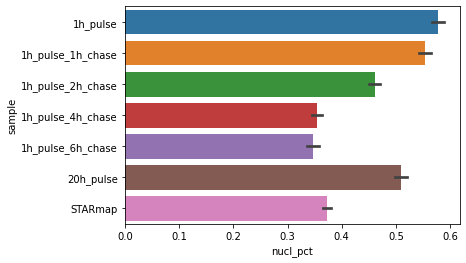

In [91]:
sns.barplot(data=adata.obs, y='sample', x='nucl_pct', orient='h')